# Delicious Asian and Indian Cuisines 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from imblearn.over_sampling import SMOTE

In [2]:
df  = pd.read_csv('../data/cuisines.csv')

In [3]:
df

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,57686,japanese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2444,57687,japanese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2445,57688,japanese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2446,57689,japanese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.cuisine.unique()

array(['indian', 'thai', 'chinese', 'japanese', 'korean'], dtype=object)

In [5]:
df.almond.unique()

array([0, 1])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


<Axes: xlabel='cuisine'>

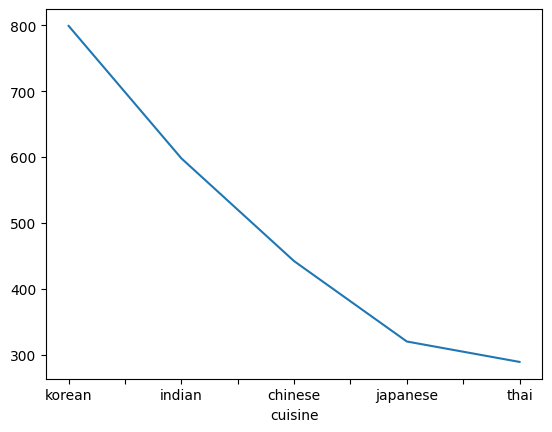

In [7]:
df.cuisine.value_counts().plot()

<Axes: xlabel='cuisine'>

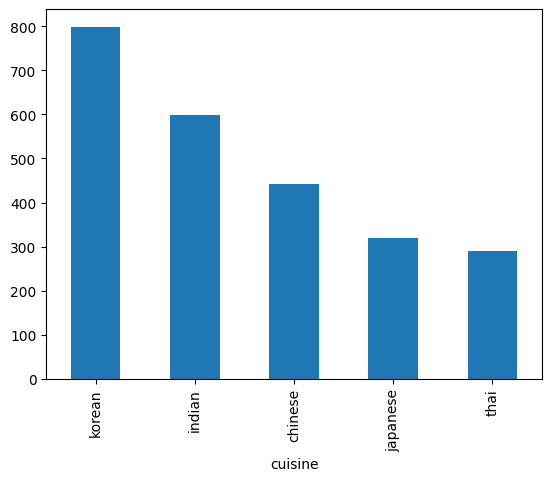

In [8]:
df.cuisine.value_counts().plot(kind='bar')

<Axes: ylabel='cuisine'>

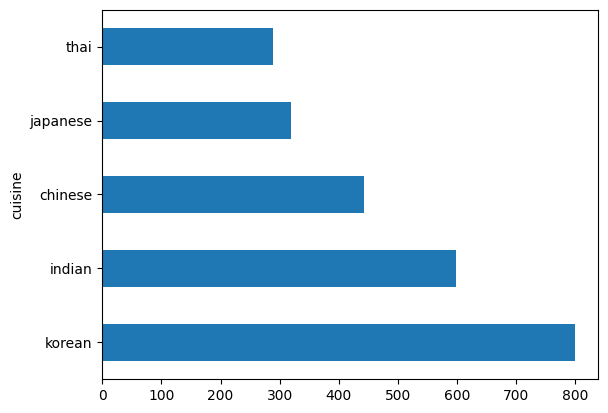

In [9]:
df.cuisine.value_counts().plot(kind='barh')

In [10]:
thai_df = df[df.cuisine == 'thai']
japanese_df = df[df.cuisine == 'japanese']
chinese_df = df[df.cuisine == 'chinese']
indian_df = df[df.cuisine == 'indian']
korean_df = df[df.cuisine == 'korean']

In [11]:
print(thai_df.shape)
print(japanese_df.shape)
print(chinese_df.shape)
print(indian_df.shape)
print(korean_df.shape)

(289, 385)
(320, 385)
(442, 385)
(598, 385)
(799, 385)


In [12]:
df.columns

Index(['Unnamed: 0', 'cuisine', 'almond', 'angelica', 'anise', 'anise_seed',
       'apple', 'apple_brandy', 'apricot', 'armagnac',
       ...
       'whiskey', 'white_bread', 'white_wine', 'whole_grain_wheat_flour',
       'wine', 'wood', 'yam', 'yeast', 'yogurt', 'zucchini'],
      dtype='object', length=385)

Discovering Ingredients

In [13]:
df.head(10)

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,70,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,71,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,72,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,73,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,74,indian,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [14]:
df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,65,66,67,68,69,70,71,72,73,74
cuisine,indian,indian,indian,indian,indian,indian,indian,indian,indian,indian
almond,0,1,0,0,0,0,1,0,0,0
angelica,0,0,0,0,0,0,0,0,0,0
anise,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
wood,0,0,0,0,0,0,0,0,0,0
yam,0,0,0,0,0,0,0,0,0,0
yeast,0,0,0,0,0,0,0,0,0,0
yogurt,0,0,0,0,1,0,1,1,1,0


In [15]:
def create_ingredient_df(df):
    ingredient_df = df.drop(['Unnamed: 0', 'cuisine'], axis = 1)
    ingredient_df = ingredient_df.sum(axis = 0).to_frame('value')
    ingredient_df = ingredient_df[ingredient_df['value'] != 0]
    ingredient_df = ingredient_df.sort_values(by = 'value', ascending = False)
    return ingredient_df

In [16]:
thai_ingredient_df = create_ingredient_df(thai_df)
japanese_ingredient_df = create_ingredient_df(japanese_df)
chinese_ingredient_df = create_ingredient_df(chinese_df)
indian_ingredient_df = create_ingredient_df(indian_df)
korean_ingredient_df = create_ingredient_df(korean_df)

               value
garlic           173
fish             153
cayenne          136
cilantro         121
ginger           114
coconut          111
vegetable_oil    106
coriander        105
rice             102
chicken           97
               value
soy_sauce        182
rice             142
vinegar          118
vegetable_oil    112
sake              89
egg               88
scallion          85
ginger            82
garlic            71
wine              64
               value
soy_sauce        303
ginger           236
garlic           234
scallion         213
sesame_oil       175
vegetable_oil    166
starch           164
vinegar          126
rice             118
cayenne          116
               value
cumin            361
turmeric         304
onion            298
coriander        286
cayenne          284
garlic           276
ginger           250
vegetable_oil    249
pepper           185
fenugreek        172
                     value
garlic                 472
scallion              

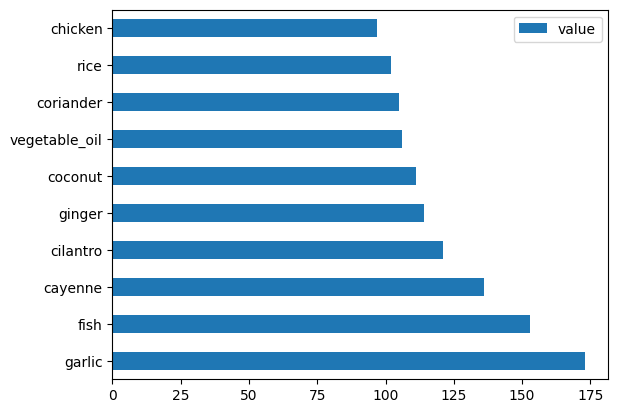

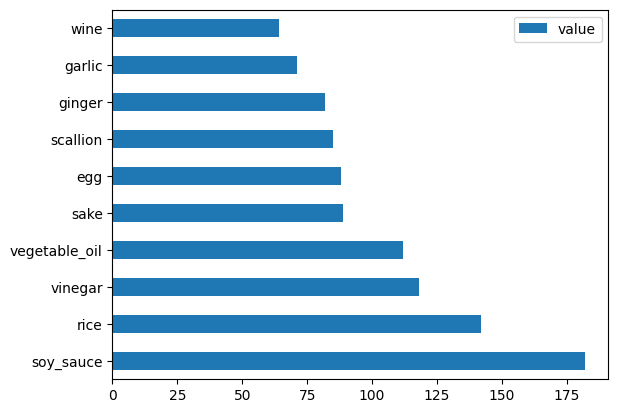

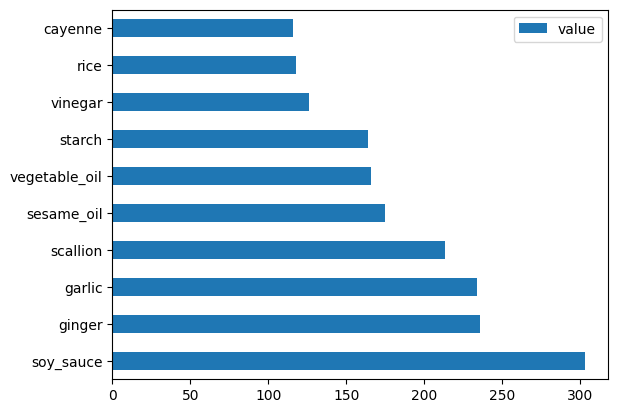

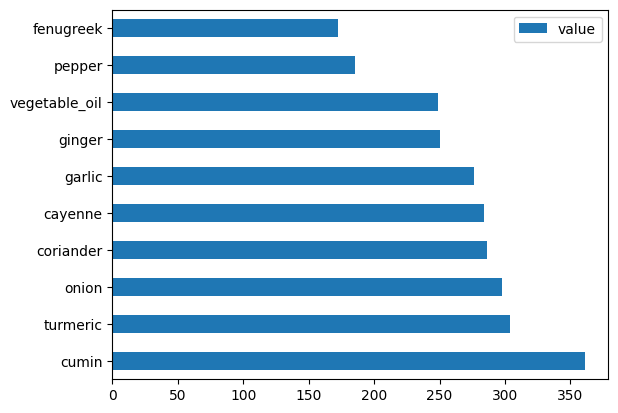

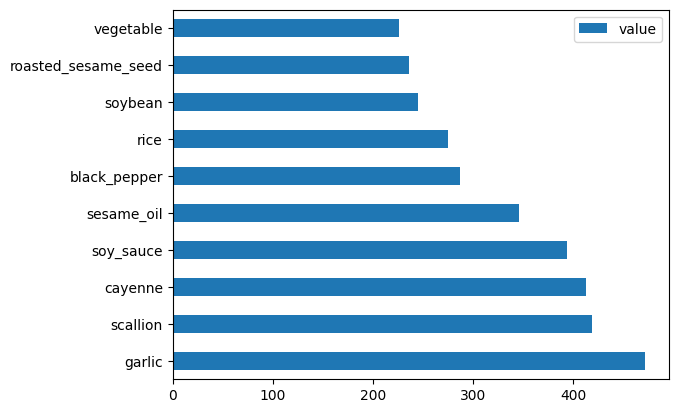

In [17]:
cuisine_ingredient_df = [thai_ingredient_df, japanese_ingredient_df, chinese_ingredient_df, indian_ingredient_df, korean_ingredient_df]

for cuisine in cuisine_ingredient_df:
    print(cuisine.head(10))
    cuisine.head(10).plot(kind='barh')

In [18]:
feature_df = df.drop(['cuisine','Unnamed: 0','rice','garlic','ginger'], axis=1)
labels_df = df.cuisine #.unique(


In [19]:
feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
labels_df

0         indian
1         indian
2         indian
3         indian
4         indian
          ...   
2443    japanese
2444    japanese
2445    japanese
2446    japanese
2447    japanese
Name: cuisine, Length: 2448, dtype: object

In [21]:
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)


In [24]:
feature_df.shape

(2448, 380)

In [25]:
transformed_feature_df.shape

(3995, 380)

In [26]:
print(f'new label count: {transformed_label_df.value_counts()}')
print(f'old label count: {df.cuisine.value_counts()}')

new label count: cuisine
indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: count, dtype: int64
old label count: cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64


In [27]:
df

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,57686,japanese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2444,57687,japanese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2445,57688,japanese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2446,57689,japanese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
transformed_feature_df

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
transformed_label_df

0       indian
1       indian
2       indian
3       indian
4       indian
         ...  
3990      thai
3991      thai
3992      thai
3993      thai
3994      thai
Name: cuisine, Length: 3995, dtype: object

In [30]:
transformed_df = pd.concat([transformed_label_df, transformed_feature_df], axis=1, join='outer')

In [31]:
transformed_df.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
3990,thai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3991,thai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3992,thai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3993,thai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3994,thai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
transformed_df.tail()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
3990,thai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3991,thai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3992,thai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3993,thai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3994,thai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
transformed_df.to_csv("../data/cleaned_cuisines.csv")